# Decision Tree Learning Activity

Build a regression tree decisionmaking funciton

Show that the function works for 2 splits of a tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

Helper function to build the data

In [2]:
#build data
xmin = 0
xmax = 5

def makedata(myseed):
    np.random.seed(myseed)
    xmin = 0
    xmax = 5
    #select features to sample at
    obsCount = 500
    X = np.random.uniform(xmin,xmax,size = (obsCount,2))
    #set up y by regions
    y = np.zeros((obsCount,1))
    R1 = np.logical_and(X[:,0]<=2 , X[:,1]<=2)
    R2 = np.logical_and(X[:,0]<=2 , X[:,1]>2)
    R3 = np.logical_and((X[:,0]>2) & (X[:,0]<=3) , X[:,0]>2)
    R4 = np.logical_and(X[:,0]>3 , X[:,1]<=3.5)
    R5 = np.logical_and(X[:,0]>3 , X[:,1]>3.5)
    #set up y values for each region
    y[R1,0] = 10
    y[R2,0] = 20
    y[R3,0] = 5
    y[R4,0] = 15
    y[R5,0] = 0
    #add noise to data
    noise = np.random.normal(0,0.5,(obsCount,1))
    y = y + noise
    d = np.hstack((X,y))
    df = pd.DataFrame(data = d, columns = ['X1','X2','Y'],dtype=float)
    return(df)

## Student Code Required:

write a function to return the RSS of a dataset, given that the prediction will be the mean of the y values

In [4]:
def computeRSSonMean(df):
    RSS = None #placeholder
    
    ####  STUDENT CODE HERE  ####

    y = df.Y.values
    obsCount = len(y)
    #compute RSS

    errs = np.reshape(y-np.mean(y),(obsCount,-1))
    RSS = np.dot(errs.T,errs)

    #### END STUDENT CODE #####
    
    return(RSS)      

## Student Code Required:

Helper Function

Given a feature to split, and a value split the data into 2 subrframes.

In [5]:
def divideFrame(df,splitFeature,splitVal):
    
    
    dfLow = None #placeholder for df below the split value
    dfHigh = None #placeholder for df above the split value

    ####  STUDENT CODE HERE  ####
    
    dfMask = df[splitFeature]<=splitVal
    dfLow = df[dfMask]
    dfHigh = df[~dfMask]

    #### END STUDENT CODE #####

    return(dfLow,dfHigh)



## Student Code Required:

implement a function to determine the best split feature and value on a dataset

return the feature, value, and resulting RSS

In [6]:
#split a region into exactly 2 halves along exactly 1 feature
def pickSplit(df):
    splitFeature = None  # placeholder
    splitValue = None    # placeholder

    splitValueX1 = None  # placeholder
    splitValueX2 = None  # placeholder

    
    ####  STUDENT CODE HERE  ####
    
    df1 = df.sort_values(by='X1')
    x1 = np.array(df1.X1)
    df2 = df.sort_values(by='X2')
    x2 = np.array(df2.X2)
    
    #find midpoints
    x1firsts = x1[0:-1]
    x1seconds = x1[1:]
    x1mids = (x1firsts+x1seconds)/2
    
    x2mids = (x2[0:-1]+x2[1:])/2

    obsCount = len(x1)
    #compute initial RSS
    initRSS = computeRSSonMean(df)
    bestRSSx1= initRSS
    bestRSSx2 = initRSS
    bestIndexX1 = 0
    bestIndexX2 = 0
    for dpindex in range(0,len(x1mids)):
        #assume split at this x1 or x2
        #First, assume that we've created a partition and figure out which
        #points fall into each region
        #Do this simultaneously on both axes (X1 and X2)
        #note that we are not actually creating a partition at this time
        currx1 = x1mids[dpindex]
        currx2 = x2mids[dpindex]
        x1mask = x1<=currx1
        x2mask = x2<=currx2  

        #compute the new RSS if we split the points by X1    
        dfX1low, dfX1high = divideFrame(df,'X1',currx1)
        X1RSS = computeRSSonMean(dfX1low)+computeRSSonMean(dfX1high)
        #print("Split on X1 at ",currx1," yields RSS ", X1RSS, " on obscounts", len(dfX1low.index), len(dfX1high.index))
        #compute the new RSS if we split the points by X2
        dfX2low, dfX2high = divideFrame(df,'X2',currx2)
        X2RSS = computeRSSonMean(dfX2low)+computeRSSonMean(dfX2high)

        #store the best split in each feature
        if X1RSS<bestRSSx1:
            bestIndexX1 = dpindex
            bestRSSx1 = X1RSS
            splitValueX1 = currx1
        if X2RSS <bestRSSx2:
            bestIndexX2 = dpindex
            bestRSSx2 = X2RSS
            splitValueX2 = currx2
    #compute the best overall split
    if bestRSSx2<=bestRSSx1:
        splitFeature = 'X2'
        splitValue = splitValueX2
        bestRSS = bestRSSx2
        dfF_low = dfX2low
        dfF_high = dfX2high
    else:
        splitFeature = 'X1'
        splitValue = splitValueX1
        bestRSS = bestRSSx1
        dfF_low = dfX1low
        dfF_high = dfX1high
        
    #### END STUDENT CODE #####

    return(splitFeature,splitValue,bestRSS)

Make the data and show the 3d view

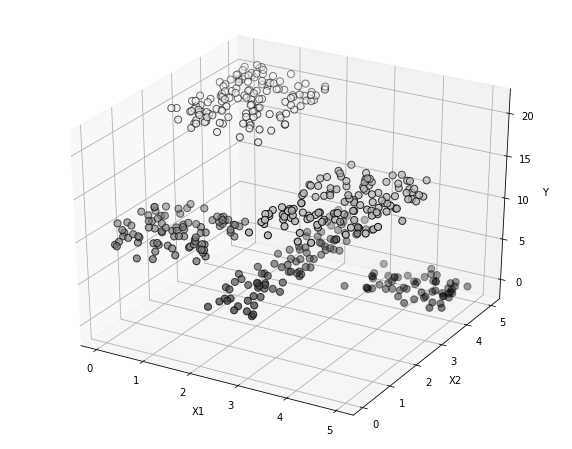

In [7]:
df = makedata(42)

threedee = plt.figure(figsize=(10,8)).gca(projection='3d')
threedee.scatter(df.X1,df.X2,df.Y, c=df.Y, s=50, cmap='gray',edgecolors='k')
threedee.set_xlabel('X1')
threedee.set_ylabel('X2')
threedee.set_zlabel('Y')
plt.show()

Topdown view of dataset

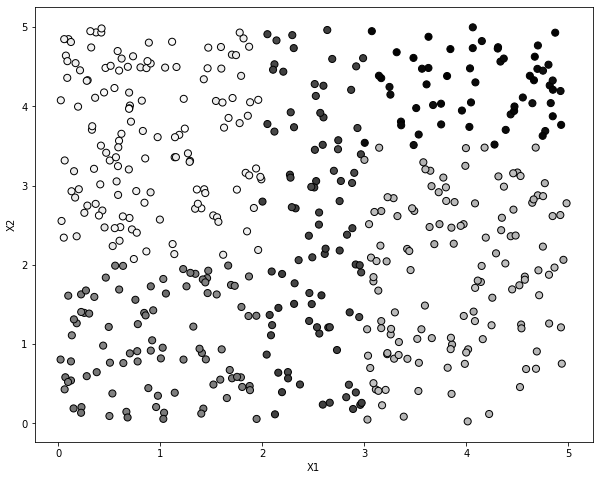

In [7]:
topdown = plt.figure(figsize=(10,8)).gca()
topdown.scatter(df.X1,df.X2,c=df.Y, s=50, cmap='gray',edgecolors='k')
topdown.set_xlabel('X1')
topdown.set_ylabel('X2')
plt.show()

## Students - toggle the line below once your code is complete... otherwise the remaining code will crash

In [9]:
finishedCode=True  #make this True once your student code is done

Display the dataset top-down with the first and second splits shown graphically

Best 1st split:  X1 1.9981694881817487 , RSS =  16346.739993900164
Best 2nd Split:  X2 3.4962847016552057 , RSS =  4799.969513184029


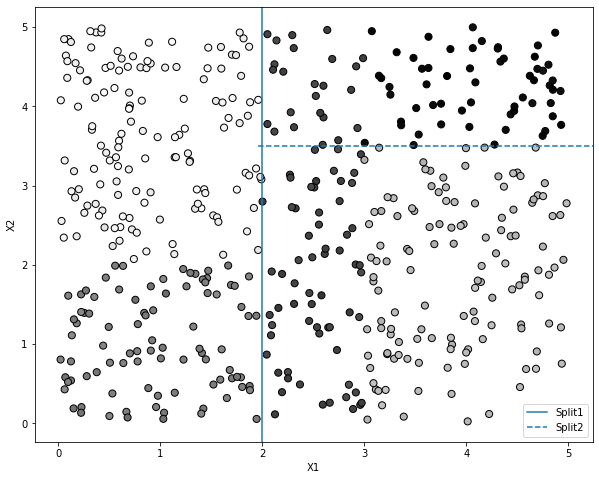

In [10]:
if finishedCode:
    regions = plt.figure(figsize=(10,8)).gca()
    regions.scatter(df.X1,df.X2,c=df.Y, s=50, cmap='gray',edgecolors='k')
    regions.set_xlabel('X1')
    regions.set_ylabel('X2')


    feat,val,bestRSS = pickSplit(df)
    print("Best 1st split: ", feat,val, ", RSS = ", bestRSS.item())
    if feat==('X1'):
        # split on x axis
        regions.axvline(val,label="Split1")
    else:
        # split on y axis 
        regions.axhline(val,label="Split1")

    dfLow,dfHigh = divideFrame(df,feat,val)
    #decide which region to split next
    fLow,vLow,RSSLow = pickSplit(dfLow)
    fHigh,vHigh,RSSHigh = pickSplit(dfHigh)
    if (RSSLow+computeRSSonMean(dfHigh))<=(RSSHigh+computeRSSonMean(dfLow)):
        feat2,val2,bestRSS2 = pickSplit(dfLow)
        # note in this split we should only include a partial line when feat does not match feat 2
        if feat !=feat2:
            #keep only the low side since we are splitting it
            keepline = [xmin,(val+xmin)/(xmax-xmin)]
            
        else:
            keepline = [xmin,xmax]
        
        fullRSS2 = bestRSS2+RSSHigh
        
        if feat2==('X1'):
            # split on horizontal axis
            regions.axvline(val2, keepline[0],keepline[1], ls='--',label="Split2")
        else:
            # split on y axis 
            regions.axhline(val2, keepline[0], keepline[1], ls='--',label="Split2")

        
    else:
        feat2,val2,bestRSS2 = pickSplit(dfHigh)
        if feat !=feat2:
            #keep only the low side since we are splitting it
            keepline = [(val+xmin)/(xmax-xmin),xmax]
        else:
            keepline = [xmin,xmax]
        
        fullRSS2 = bestRSS2+RSSLow
        if feat2==('X1'):
            # split on vertical axis
            regions.axvline(val2, keepline[0],keepline[1], ls='--',label="Split2")
        else:
            # split on y axis 
            regions.axhline(val2, keepline[0],keepline[1], ls='--',label="Split2")
        

    print("Best 2nd Split: ",feat2,val2,", RSS = ", fullRSS2.item())
    plt.legend()
    plt.show

    
